In [8]:
# !pip install bertopic

In [9]:
from bertopic import BERTopic

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re

import string
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords') 

nltk.download('wordnet') 
nltk.download('omw-1.4')

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.decomposition import TruncatedSVD
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from imblearn.under_sampling import RandomUnderSampler



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ve797\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ve797\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\ve797\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\ve797\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [11]:
import imblearn
print(imblearn.__version__)

0.10.1


## Load Dataset

In [12]:
data = pd.read_csv(
    "sentiment_tweets3.csv")
print(data.shape)
data.head()


(10314, 3)


,Index,message to examine,label (depression result)
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [13]:
data['label (depression result)'].value_counts()

0    8000
1    2314
Name: label (depression result), dtype: int64

In [14]:
data.isna().sum()

Index                        0
message to examine           0
label (depression result)    0
dtype: int64

In [15]:
#check the shape of your dataset
print(data.shape)

(10314, 3)


## Data Preprocessing

- **Convert to lowercase**
- **Remove special characters**
- **Remove stopwords**
- **Lemmatization**
- 

### drop the index column

In [16]:
data = data.drop('Index', axis=1)
data.head()

,message to examine,label (depression result)
0,just had a real good moment. i missssssssss hi...,0
1,is reading manga http://plurk.com/p/mzp1e,0
2,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,@lapcat Need to send 'em to my accountant tomo...,0
4,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


### Remove special characters

In [17]:
stop_words = stopwords.words('english') 
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [18]:
punctuation_list = list(string.punctuation)
print(punctuation_list)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~']


In [19]:
useless_words = stop_words + punctuation_list

In [20]:
# remove punctuation and stopwords in review_text column

data["message to examine"] = data["message to examine"].str.lower().str.replace("[^\w\s]", "", regex=True).apply(
    lambda x: " ".join(word for word in word_tokenize(x) if word not in useless_words)
)

data["message to examine"].head(10)


0                   real good moment missssssssss much
1                     reading manga httpplurkcompmzp1e
2    comeagainjen httptwitpiccom2y2lx httpwwwyoutub...
3    lapcat need send em accountant tomorrow oddly ...
4                    add myspace myspacecomlookthunder
5                     sleepy good times tonight though
6    silkcharm nbn someone already said fiber home ...
7                         23 24ï½c possible today nice
8                       nite twitterville workout ciao
9                   dananner night darlin sweet dreams
Name: message to examine, dtype: object

### Lemmatization

In [21]:
# apply lemmatization to message to examine column

lemmatizer = WordNetLemmatizer()

data["message to examine"] = data["message to examine"].apply(
    lambda x: " ".join(lemmatizer.lemmatize(word) for word in word_tokenize(x))
)

data.head()

,message to examine,label (depression result)
0,real good moment miss much,0
1,reading manga httpplurkcompmzp1e,0
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutub...,0
3,lapcat need send em accountant tomorrow oddly ...,0
4,add myspace myspacecomlookthunder,0


In [22]:
data["message to examine"].apply(
    lambda x: " ".join(tag for _, tag in nltk.pos_tag(word_tokenize(x)))
)

0                                        JJ JJ NN NNS RB
1                                              VBG NN NN
2                                               NN NN NN
3        NNS VBP VBP JJ NN NN RB VBD RB VBG NN VBG NN IN
4                                               VB NN NN
                              ...                       
10309                  NN NN NN NN NN VBN VBG NNS VBP VB
10310                       NN NNS NN VBP NN IN NN RB RB
10311                         NN NN NN NN NN NN IN NN NN
10312                               JJ NN JJ NN NN NN NN
10313                                                 CD
Name: message to examine, Length: 10314, dtype: object

### Topic Modelling

In [23]:
# Instantiate the BERTopic model and fit it to the data:
topic_model = BERTopic(language="english", calculate_probabilities=True)
topics, probs = topic_model.fit_transform(data["message to examine"])

In [24]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name
0,-1,5318,-1_depression_im_love_like
1,0,387,0_twitter_tweet_twittering_tweeting
2,1,286,1_thanks_thank_haha_welcome
3,2,203,2_dinner_eat_food_yummy
4,3,190,3_emoji_face_faceemoji_cry


In [25]:
# top words associated with the last topic in the model,
topic_model.get_topic(-1)

[('depression', 0.007017846546603289),
 ('im', 0.006208889506436123),
 ('love', 0.005589800376636252),
 ('like', 0.005477906549355883),
 ('get', 0.005097799475490479),
 ('good', 0.005049602067376029),
 ('dont', 0.005011988621515153),
 ('time', 0.004894080572706644),
 ('day', 0.004860960574007343),
 ('lol', 0.004730950137546424)]

In [26]:
topic_model.get_topic(0)  # Select the most frequent topic

[('twitter', 0.08040164839800788),
 ('tweet', 0.055890405513596045),
 ('twittering', 0.017708078286100635),
 ('tweeting', 0.015694349172378486),
 ('morning', 0.014258801654819662),
 ('follow', 0.010342559207145762),
 ('lol', 0.009412230640061688),
 ('joined', 0.009349536788500158),
 ('dream', 0.009246088988511637),
 ('goodnight', 0.009159456149422845)]

In [27]:
# Visualize the topics using the built-in visualization tool:
topic_model.visualize_topics()

In [28]:
topic_model.visualize_distribution(probs[200], min_probability=0.015)

### Feature Engineering

In [29]:
# Splitting into x and y values
X = data.drop('label (depression result)', axis=1)
y = data['label (depression result)']

In [30]:
X.head()

,message to examine
0,real good moment miss much
1,reading manga httpplurkcompmzp1e
2,comeagainjen httptwitpiccom2y2lx httpwwwyoutub...
3,lapcat need send em accountant tomorrow oddly ...
4,add myspace myspacecomlookthunder


In [31]:
X.shape

(10314, 1)

In [32]:
y.shape

(10314,)

In [33]:
# vectorize the training dataset
vectorizer = TfidfVectorizer(stop_words='english',use_idf=True)
tf_idf = vectorizer.fit(X['message to examine'])
X_idf = tf_idf.transform(X['message to examine'])

In [34]:
#save to tf_idf to pickle file
import pickle       
with open('model/tf_idf.pkl', 'wb') as f:
    pickle.dump(tf_idf, f)



In [35]:
# split the dataset into training and test dataset
X_train,X_test,y_train,y_test = train_test_split(X_idf,y,test_size=0.3, random_state=42)

In [36]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7219, 22184) (7219,)
(3095, 22184) (3095,)


In [37]:
smote = SMOTE(random_state=20)
under = RandomUnderSampler(random_state=1)

steps = [('o', smote), ('u', under)]
pipeline = Pipeline(steps=steps)

X_train_res, y_train_res = pipeline.fit_resample(X_train, y_train)

In [38]:
# # Let's apply transformations to testing data
# X_test_tfidf = vectorizer.transform(X_test)


### Build classifier model 

In [39]:
# KnnClassifier
knn_classify = KNeighborsClassifier()
knn_classify.fit(X_train_res,y_train_res)



KNeighborsClassifier()

In [40]:
# Get test set predictions and evaluate model metrics
preds = knn_classify.predict(X_test)
score = accuracy_score(y_test,preds)
classify_report = classification_report(y_test,preds)
print(score)
print(classify_report)


0.39224555735056543
              precision    recall  f1-score   support

           0       1.00      0.22      0.37      2423
           1       0.26      1.00      0.42       672

    accuracy                           0.39      3095
   macro avg       0.63      0.61      0.39      3095
weighted avg       0.84      0.39      0.38      3095



In [41]:
lr_model = LogisticRegression(max_iter=200, random_state=419)
lr_model.fit(X_train, y_train)

LogisticRegression(max_iter=200, random_state=419)

In [42]:
# Get test set predictions and evaluate model metrics
preds = lr_model.predict(X_test)
score = accuracy_score(y_test,preds)
classify_report = classification_report(y_test,preds)
print(score)
print(classify_report)


0.9735056542810986
              precision    recall  f1-score   support

           0       0.97      1.00      0.98      2423
           1       1.00      0.88      0.94       672

    accuracy                           0.97      3095
   macro avg       0.98      0.94      0.96      3095
weighted avg       0.97      0.97      0.97      3095



In [ ]:
# save lr_model to pickle file
import pickle
with open('model/lr_model.pkl', 'wb') as f:
    pickle.dump(lr_model, f)
    

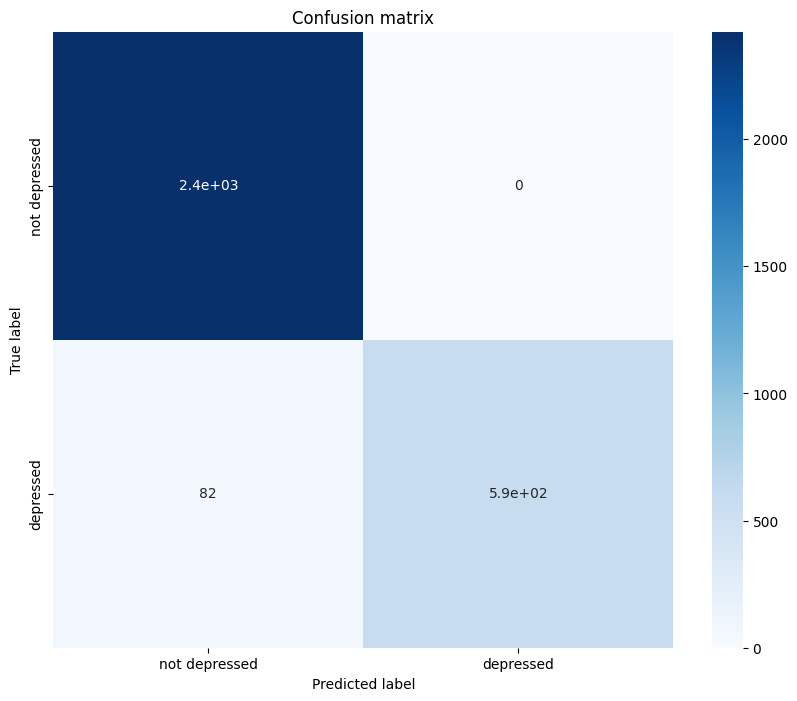

In [43]:
def plot_confusion_matrix(
    y_true, y_pred, ax, class_names, vmax=None, vmin=None, title="Confusion matrix"
):

    matrix = confusion_matrix(y_true, y_pred)

    if vmax is None:
        vmax = np.max(matrix)
    if vmin is None:
        vmin = np.min(matrix)

    matrix = pd.DataFrame(matrix, index=class_names, columns=class_names)

    sns.heatmap(matrix, cmap="Blues", annot=True, ax=ax, vmin=vmin, vmax=vmax)

    ax.set_title(title)
    ax.set_ylabel("True label")
    ax.set_xlabel("Predicted label")

    return ax


fig, ax = plt.subplots(figsize=(10, 8))
plot_confusion_matrix(
    y_test,
    preds,
    ax,
    class_names=["not depressed", "depressed"],
    title="Confusion matrix",
)
plt.show()